# Roget's Thesaurus : A Data Mining Approach

---

> Dimitrios Kokkotas, 8200076 <br />
> Dept of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> dtmkokkotas@gmail.com

* The current notebook performs an in depth analysis on the Roget's Thesaurus reference work 
* Gutenberg Project offers access in a wide range of public domain texts
* In particular, our data are fetched through this [ebook distribution](https://www.gutenberg.org/cache/epub/22/pg22-images.html)
* A brief synopsis of the Roget's Thesaurus can be found [here](https://en.wikipedia.org/wiki/Roget%27s_Thesaurus)
* A plethora of preprocessing and data mining activities are being performed on the thesaurus
* Several Data Analysis, Natural Language Processing and Machine Learning libraries are used for the needs of the assignment

## Introduction to Roget's Thesaurus

First published in 1852, Roget's Thesaurus is the brainchild of Dr. Peter Mark Roget. Unlike a standard dictionary, Roget's work doesn't simply define words – it offers a unique system of classification based on meaning and associations. This revolutionary approach provides a deeper understanding of the relationships between words, empowering users to navigate the complexities of the English language. Being a giant word toolbox, Roget's Thesaurus introduces a hierarchical classification system that makes it distinguishable it from a standard dictionary or thesaurus. This time, we focus on the following categorisation units:
* At the first level we have <b>Classes</b>, which create a conceptual framework of the thesaurus and are broken into
* <b>Divisions</b>, with them being the second hierarchy level, (may exist or not) that are further divided into
* <b>Sections</b>, which acts as an extra layer of classification and embodies further sub-sections and finally
* <b>Words at the Core</b>, being our unit of analysis corresponding to words and phrases

## Collect the Roget's Thesaurus Classification

An initial yet crucial step of this assignment, is the downloading of the thesaurus categorisation, with that involving also the words assigned to each hierarchy level. For that purpose, we perform a series of scrapping activities, so we can eventually have both categorisations and words ready for further proccesing. With Beautiful Soup being our scraper assistant, we send a request to the webpage of our interest and fetch its HTML code. By inspecting carefully the HTML content, we can identify patterns and tags & elements that hold our data. We then pull them out, making use of both vanilla Python and Beatiful Soup functionalitites. As observed, classes are declared with 'h2' tags, with the divisions (h2) , sections (h3) and words (p) being defined as nested elements. At first, we make use of a plain Python file, that being the `scrap_thesaurus.py`, which aims to bring us all the individual words with their respective categorisation levels. At this moment, we need to note that we fetch only the individual words and not the phrases found. Phrases are being identified and removed as well other redundant and unneeded information. By the completion of the `words cleaning` process, we make these data available through a DataFrame.<br><br>
Note : We make use of the NTLK's stopwords, so is required to be downloaded via the NLTK Data installer. Open the Python interpreter with `python` in your terminal and type: <br><br> `>>> import nltk` <br> `>>> nltk.download("stopwords")`

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [3]:
import scrap_thesaurus

url = "https://www.gutenberg.org/cache/epub/22/pg22-images.html"
word_data = scrap_thesaurus.scrape_rogets_thesaurus(url)
df = pd.DataFrame(word_data)

Found Classes: 6
Next Class
{'name': 'CLASS I WORDS EXPRESSING ABSTRACT RELATIONS'}
Found Divisions: 0
Found sections: 8
SECTION I. EXISTENCE
Words in this Section: positive,substantial,afoot,obtain,prevalent,unideal,dream,undestroyed,continue,prevail,vegetate,forth,subsistence,presence,endure,reality,science,unimagined,occur,byron,essence,truth,actual,breathe,indeed,absolute,positiveness,abide,substantive,arise,existence,afloat,current,actually,event,extant,remain,coexistence,begin,existing,actuality,subsist,authentic,essential,bring,appear,ontology,existent,potential,become,exist,entity,stand,perished,annihilation,imaginary,displace,virtual,missing,negative,thing,nonentity,nihility,insubstantial,inexistent,abrogate,nonsubsistence,unconceived,extinction,inexistence,nonbeing,visionary,extinct,unborn,nirvana,supposititious,virtually,unreal,ideal,absent,exhausted,remove,unbegotten,nullity,defunct,negatively,extinguishment,negativeness,vanished,departed,dissolve,nihilism,nonexistent,nothi

Words in this Section: bioplasm,oogamy,gamete,spermatozoon,mycology,metaplasm,structure,vacuole,erythroblast,metabolism,macrogamete,karyoplasmic,vacuolar,oxidation,zoogloeic,darwinism,zygote,microgamete,science,taxonomy,vertebration,isogamy,zoology,anabolism,physiology,organization,gametangium,trophoplasm,bacteriology,unsegmentic,oecology,organism,archegenesis,zoogloea,phylogeny,spermary,biology,naturalist,botany,dysmeromorph,microbiology,ontogeny,chromosome,karyaster,ovary,organic,polymorphism,cytoplasm,virology,anatomy,protozoa,zoogloeoid,morphology,invagination,ecology,protoplasm,catabolism,production,albumen,lamarkism,protein,neolamarkism,fossils,physiol,weismannism,organized,antherozoid,biotaxy,inorganization,azoic,lithoidal,mineralize,geognosy,geoscopy,mineral,geology,inorganized,inanimate,science,metallography,mineralogy,metallurgy,lithology,inorganic,oryctography,oryctology,fossilize,animal,respiration,vivifying,seneca,viability,vitality,vitalization,vitalic,inheritance,nourish

Words in this Section: perdre,perplexing,convoluted,sisyphus,deadlock,augean,strait,quagmire,thorny,quandary,hornet,scylla,straitened,formidable,plaguy,gravel,awkward,enmesh,crisis,imbroglio,onerous,scrape,awkwardness,rasper,struggle,exigency,nonplus,labyrinthine,spoke,desperate,nonplused,entanglement,convolution,hobble,irksome,puzzled,stranded,tangled,intricacy,hinder,perverse,perplex,impracticable,teaser,standstill,poser,latin,refractory,hardly,unwieldy,encumber,obstinate,ticklish,entangle,involvement,pinched,difficulty,impossible,hindrance,knotted,aground,hamlet,crabbed,pathless,impracticability,intricate,barely,hardness,operose,wheel,bother,knotty,trying,rugged,minerva,slough,toilsome,critical,trackless,hopeless,brunt,uncertain,vergil,laborious,arduous,stress,unmanageable,gordian,puzzle,uncertainty,stumbling,embarrassing,riddle,tough,difficult,hitch,scramble,invious,labor,render,uphill,paradox,graveled,ravel,dilemma,intractable,complicated,embarrassment,delicate,trial,invita,nonplu

Words in this Section: karma,nemesis,morals,hamlet,equitableness,probity,legal,reasonable,droit,deserved,lawful,rightly,virtue,right,themis,justitia,honor,propriety,astraea,justice,legitimate,deserve,fitness,cuique,rightful,reward,evenhanded,equity,cicero,henry,equatable,permitted,distribuit,equal,equable,recompense,justifiable,impartiality,illegal,unjust,hamlet,robbing,favor,unfairness,injurious,partiality,unlawfulness,iniquity,partisanship,iniquitous,grievance,unreasonableness,shame,unjustified,leaning,unallowable,peter,wrongdoing,wrongful,unfair,objectionable,immoral,inequitable,unreasonable,partial,wrong,unwarrantable,favoritism,improper,nepotism,unequitable,tortious,injustice,undueness,unequal,unfit,wrongly,unjustifiable,bigotry,substantiate,ordained,entitle,privilege,equitable,security,revendicate,pretension,sanctify,inviolable,square,enfranchised,merit,imprescriptible,permission,title,allowed,becoming,warrant,meriting,fitting,deserving,constitutional,civis,license,unalienable,pr

Proceeding, we make sure that there will be no duplicate entries on the same categorisation level, and we end up for the moment with a total of 54082 words.

In [4]:
df = df.drop_duplicates(subset=['class', 'division', 'section', 'word'])
df.shape

(54082, 4)

In [5]:
df.sample(2)

,class,division,section,word
25891,CLASS IV WORDS RELATING TO THE INTELLECTUAL FA...,DIVISION (I) FORMATION OF IDEAS,SECTION II. PRECURSORY CONDITIONS AND OPERATIONS,slovenly
42868,CLASS V WORDS RELATING TO THE VOLUNTARY POWERS,DIVISION (I) INDIVIDUAL VOLITION,SECTION IV. ANTAGONISM,nonplused


## Get the Word Embeddings

Our next task is to collect the word embeddings for all the individual words. Word Embeddings help us represent textual information as dense, real-valued vectors within a multidimensional space. Being less wasteful than one-hot encoding and contributing to distributes representation, word embeddings allow us to associate a vector of real values to each word. In contrast to the one-hot encoding, where the meaning of a word is stored solely under a single value of 1, with word embeddings we accomplish the allocation of the meaning to the total of the vector values. That vectors, holding numerical representation of each word, helps models gain a better understaning of the words relationships. As a common example, the words dog and cat are two related words, and that can be proved through similarity metrics. Essentially, those two words, tend to be clustered closer together in this vector space. Each vector consists of dimensions, and in our case by using the `glove-wiki-gigaword-50` pre-trained model, we have multiple 50-long vectors. We use pre-trained models, since they are beneficial in terms of transfer learning and computational savings. Moreover, the fact that they are trained in massive text datasets, guarantees the capturing of complex semantic and syntactic relationship. Glove allows us transforming words into numerical vectors capturing their semantic meaning, by using statistics about how often words appear together (co-occur). Glove is considered to be a distributor of high-quality word embeddings that are performant in plenty of tasks ( similarity, analogy, relatedness etc.). Again, it is a technique that relies on the distribution of words and their co-occurrence frequencies within a text corpus. The majority of the training data for `glove-wiki-gigaword-50`, derives from Wikipedia, with the Gigaword dataset consisting of news articles, offering a real-world language perspective. Is offered at no charge, however is said to be inferior when compared to other embedding models like those recently introduced by OpenAI (text-embedding-3-large).<br><br> After getting the embeddings we store them under our DataFrame and eventually end up with a total of 43253 words.

In [6]:
import gensim.downloader 
glove_model = gensim.downloader.load('glove-wiki-gigaword-50')
def get_glove_embedding(word, model):
    if word in model: 
        return model[word]
    else:
        return None  # Or a default embedding for unknown words
df['embedding'] = df['word'].apply(lambda x: get_glove_embedding(x, glove_model))
df = df[df['embedding'].notnull()]
df.shape

(43253, 5)

Our next step, is to store the word embeddings under a storage file / system of our preference. We opt for JSON. One could also go with vector databases (like faiss or chroma), which allow efficient spatial queries and provide flexibility and scalability.

In [7]:
import json
def prepare_data_for_json(df):
    data = df.to_dict(orient='records')  
    for row in data:
        if row['embedding'] is not None and row['embedding'].any():  # check whether the word embedding exists
            row['embedding'] = row['embedding'].tolist() 
    return data

prepared_data = prepare_data_for_json(df.copy())
with open('word_embeddings.json', 'w') as outfile:
    json.dump(prepared_data, outfile, indent=4)  # we adjust the indentation for readability

And here is how the JSON file looks like.

In [8]:
with open('word_embeddings.json') as f:
    data = json.load(f)

first_elements = data[:2]
print(json.dumps(first_elements, indent=4))

[
    {
        "class": "CLASS I WORDS EXPRESSING ABSTRACT RELATIONS",
        "division": null,
        "section": "SECTION I. EXISTENCE",
        "word": "positive",
        "embedding": [
            -0.0059413001872599125,
            0.40832000970840454,
            -0.1894800066947937,
            0.06542100012302399,
            0.7416700124740601,
            0.2277899980545044,
            0.2417300045490265,
            -0.3015100061893463,
            0.5701900124549866,
            1.4285000562667847,
            0.9125400185585022,
            -0.2481900006532669,
            -0.5144000053405762,
            -0.451449990272522,
            0.6587299704551697,
            0.22533999383449554,
            0.06928300112485886,
            -0.6361299753189087,
            -0.37512001395225525,
            -0.7169600129127502,
            -0.26886001229286194,
            0.24897000193595886,
            0.853380024433136,
            -0.03471300005912781,
            0.702109

In [9]:
df.head()

,class,division,section,word,embedding
0,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,None,SECTION I. EXISTENCE,positive,"[-0.0059413, 0.40832, -0.18948, 0.065421, 0.74..."
1,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,None,SECTION I. EXISTENCE,substantial,"[0.83027, 0.33859, -0.06427, -0.37037, 0.33209..."
2,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,None,SECTION I. EXISTENCE,afoot,"[1.3642, -1.0154, -0.040394, 0.073249, -0.1847..."
3,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,None,SECTION I. EXISTENCE,obtain,"[0.34592, 0.14788, 0.59427, -0.15454, 0.44617,..."
4,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,None,SECTION I. EXISTENCE,prevalent,"[-0.071623, -0.37161, -1.1953, -0.42149, -0.77..."


As mentioned, each vector consists of 50 dimensions. Within them, the meaning of the word is distributed

In [10]:
df['embedding'][0].shape

(50,)

## Data Mining through Clustering

Clustering, is an unsupervised machine learning method,  since we don't have pre-labeled data to train our model. It accomplishes patterns identification extracted from the data and conducts the groupping of objects based on similarity criteria. The main goal is to discover and group similar data points together into clusters. Data points within a cluster should be more similar to each other than to data points in other clusters. Similarity examination is being performed with the usage of several measurements like cosine simalarity. By applying clustering analysis in our case, we are able to investigate how clustering results are compared with the original Roget's Thesaurus categorisations. Hierarchical clustering, (aka agglomerative clustering) through a bottom-up clusters creation approach, can indeed be an option. However, since it is computationally intensive task and delivers undesired results, we go with k-means clustering. The process is as follows : 
* we define the number of clusters (K)
* algorithm randomly selects K data points to serve as initial cluster centroids
* each data point in our dataset is assigned to the cluster whose centroid is closest
* algorithm recalculates the centroids of each cluster, by taking the average (mean) of all the data points assigned to that cluster
* the last two steps are repeated iteratively
* data points might switch clusters during re-assignment as the centroids get adjusted
* process continues until the centroids stop moving significantly or a maximum number of iterations is reached

We are asked to measure the agreement between the clusters you find and the classes defined by Roget's Thesaurus. The comparison will be at the class level and the section / division level. We need to note that no scaling operation is needed here on the vectors' data, since the embeddings are already normalized to some extent.

Clusters' number decision is an important one and is supported by a couple of methods.<br>
We start with the elbow method provided by the yellowbrick library. On the x axis we have the number of clusters. On the y axis we have sum of squared distances from each observation to the centroid of its cluster.

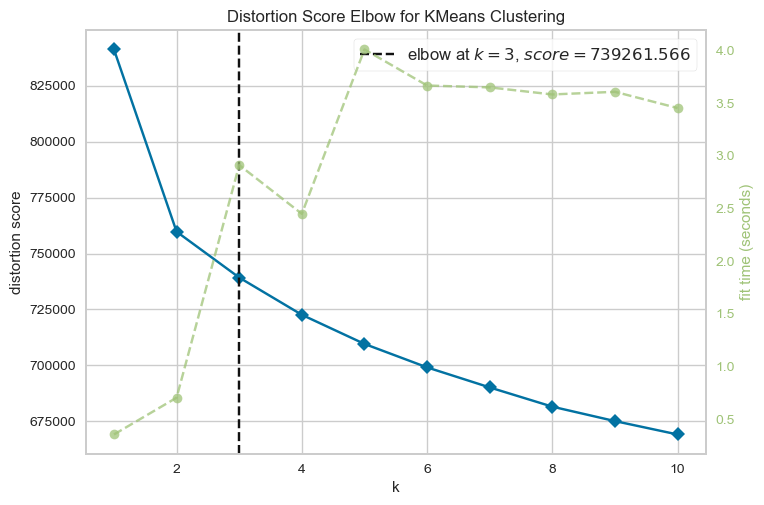

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# collect the data from JSON
embeddings = [row['embedding'] for row in data]
X = np.array(embeddings)

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(X)
_ = visualizer.show()

We can also make use of the silhouette scores, another useful tool that will help us understand the proportion of data points that are probably placed in the wrong cluster. 3 as the number of classes seems to be appropriate, however, sincde we are asked to compare clustering results with the categorisations we set the number of classes to 6 and 24 (total sections / divisions always on the SECOND hierarchy level.

In [12]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score,\
    completeness_score, homogeneity_score, v_measure_score

n_clusters_class = 6
n_clusters_section_division = 24

kmeans_class = KMeans(n_clusters=n_clusters_class, random_state=42)
df['class_cluster'] = kmeans_class.fit_predict(X)

kmeans_section_division = KMeans(n_clusters=n_clusters_section_division, random_state=42)
df['section_division_cluster'] = kmeans_section_division.fit_predict(X)

Our goal is to measure the agreement between the cluster results and the original classes. In that direction, we can use evaluation metrics designed for such clustering tasks. Some common metrics are Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI), Homogeneity, Completeness and V-measure. These metrics provide a quantitative measure of how well the clustering results match the ground truth labels. In particular:
* <b>ARI</b> measures the similarity between two clusterings, considering all pairs of samples and counting pairs that are assigned to the same or different clusters in the predicted and true clusterings.ARI values range from -1 to 1
* <b>AMI</b> measures the mutual information between the true labels and the predicted clusters, normalized to produce a score between 0 and 1. Essentially, it assesses the quality of clustering independent of the absolute values of the labels.
* <b>Homogeneity</b> measures whether each cluster contains only members of a single class. A clustering result satisfies homogeneity if all of its clusters contain only data points that are members of a single class
* <b>Completeness</b> measures whether all members of a given class are assigned to the same cluster. A clustering result satisfies completeness if all data points that are members of a given class are elements of the same cluster. Completeness score ranges from 0 to 1.
* <b>V-measure</b> is the harmonic mean of homogeneity and completeness, which provides a balanced evaluation of both. It considers both the purity of the clusters and the completeness of the clustering.

In [13]:
class_ari = adjusted_rand_score(df['class'], df['class_cluster'])
class_ami = adjusted_mutual_info_score(df['class'], df['class_cluster'])
class_completeness = completeness_score(df['class'], df['class_cluster'])
class_homogeneity = homogeneity_score(df['class'], df['class_cluster'])
class_v_measure = v_measure_score(df['class'], df['class_cluster'])

print("Class Level Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", class_ari)
print("Adjusted Mutual Information (AMI):", class_ami)
print("Completeness Score:", class_completeness)
print("Homogeneity Score:", class_homogeneity)
print("V-measure Score:", class_v_measure)

Class Level Clustering Evaluation:
Adjusted Rand Index (ARI): 0.01808963991363364
Adjusted Mutual Information (AMI): 0.028296333027095482
Completeness Score: 0.028584299825710428
Homogeneity Score: 0.028330831628760055
V-measure Score: 0.028457001324367116


At this moment, we need a method, that will return only the second hierarchy level categorisations. That will prevent us from taking into consideration even the sections nested in divisions. These sections are considered to be of third hierarchy level. So for each record we map its label with its division (if exists) or with its section (if division does not exist)

In [14]:
def create_consistent_labels(df):
    label_mapping = {}
    consistent_labels = []
    for section, division in zip(df['section'], df['division']):
        if division is None:
            label = section
        else:
            label = division
        if (section, division) not in label_mapping:
            label_mapping[(section, division)] = label
        consistent_labels.append(label_mapping[(section, division)])
    return consistent_labels

In [15]:
# stores the mapped values between record and division or section depending on division existence
section_division_label = create_consistent_labels(df.copy())

In [16]:
section_division_ari = adjusted_rand_score(section_division_label, df['section_division_cluster'])
section_division_ami = adjusted_mutual_info_score(section_division_label, df['section_division_cluster'])
section_division_completeness = completeness_score(section_division_label, df['section_division_cluster'])
section_division_homogeneity = homogeneity_score(section_division_label, df['section_division_cluster'])
section_division_v_measure = v_measure_score(section_division_label, df['section_division_cluster'])

print("\nSection/Division Level Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", section_division_ari)
print("Adjusted Mutual Information (AMI):", section_division_ami)
print("Completeness Score:", section_division_completeness)
print("Homogeneity Score:", section_division_homogeneity)
print("V-measure Score:", section_division_v_measure)


Section/Division Level Clustering Evaluation:
Adjusted Rand Index (ARI): 0.01173452652696794
Adjusted Mutual Information (AMI): 0.045837473199473365
Completeness Score: 0.04592858243557518
Homogeneity Score: 0.04980408685124339
V-measure Score: 0.04778788945543033


The results for both comparison levels do not deviate. Overviewing them results of the evaluation metrics, we can understand that :
* both ARI and AMI outputs indicate that there is a very low level of agreement between the predicted clustering and the true classes - divisions/sections
* only a small proportion of members from the same class are assigned to the same cluster, based on the Completeness and Homogeneity metric
* V-measure validates the aforementioned and also informs us about the very low level of clustering quality

Applying DBSCAN, this time only on class level,we see that the agreement between the clustering results and the original classes is really weak. DBSCAN groups together points that are closely packed together in high-density regions.

In [17]:
from sklearn.cluster import DBSCAN

eps = 0.5  # is the maximum distance between samples for them to be in the same neighborhood 
min_samples = 10  # is the minimum number of samples in a neighborhood to be considered a core point

# Class Level Clustering
dbscan_class = DBSCAN(eps=eps, min_samples=min_samples)
df['class_cluster_dbscan'] = dbscan_class.fit_predict(X)

# Section/Division Level Clustering
dbscan_section_division = DBSCAN(eps=eps, min_samples=min_samples)
df['section_division_cluster_dbscan'] = dbscan_section_division.fit_predict(X)

class_ari = adjusted_rand_score(df['class'], df['class_cluster_dbscan'])
class_ami = adjusted_mutual_info_score(df['class'], df['class_cluster_dbscan'])
class_completeness = completeness_score(df['class'], df['class_cluster_dbscan'])
class_homogeneity = homogeneity_score(df['class'], df['class_cluster_dbscan'])
class_v_measure = v_measure_score(df['class'], df['class_cluster_dbscan'])

print("Class Level Clustering Evaluation with DBSCAN:")
print("Adjusted Rand Index (ARI):", class_ari)
print("Adjusted Mutual Information (AMI):", class_ami)
print("Completeness Score:", class_completeness)
print("Homogeneity Score:", class_homogeneity)
print("V-measure Score:", class_v_measure)

Class Level Clustering Evaluation with DBSCAN:
Adjusted Rand Index (ARI): -9.09504529173225e-05
Adjusted Mutual Information (AMI): -0.00015935399346645953
Completeness Score: 0.024607355762263375
Homogeneity Score: 0.0031538784339546944
V-measure Score: 0.0055911497382797135


Eventually, the low levels of the results received can be caused by problematic situations such as:
* High-Dimensional Data - [Curse of Dimensionality](https://www.quora.com/What-is-the-curse-of-dimensionality): since our vectors hold 50 dimensions. It is indeed difficult for distance-based clustering algorithms to effectively find meaningful clusters, as distances between points tend to become less informative
* Sensitivity to Hyperparameters : as found through the elbow method the appropriate number of clusters for k-means is 3. Setting the number of classes, just for the needs of our task, may have a strong impact on the algorithm's performance 

PCA (Principal Component Analysis) is an unsupervised Machine Learning method, that helps us face overfitting issues that may arise. It is dimensionality reduction technique, that produces new fewer dimensions (in comparison to the existing ones) that shall cover the largest possible variance across these dimensions. Also we need the data in the new dimensions to be as close as possible to the data in the original dimensions. Let's visualize in 2D and 3D. This may provide us a quick, intuitive way to explore potential relationships and patterns within your word embeddings, however the loss of Information (reducing 50 dimensions to 2) is inevitable, since we discard significant information.

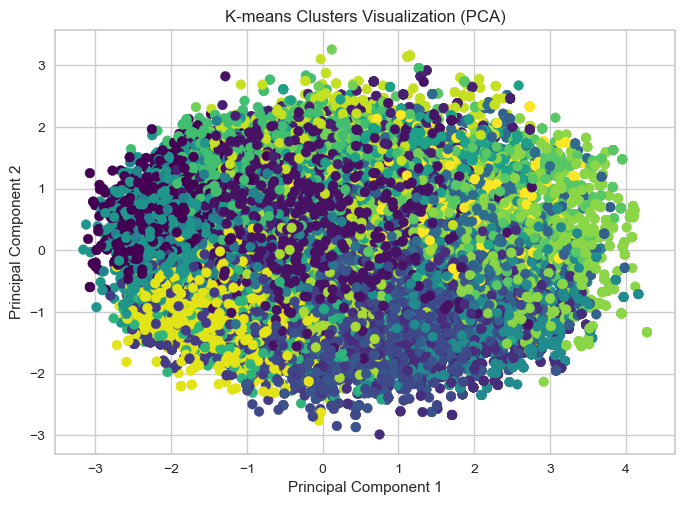

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # reduce to 2 dimensions
X_reduced = pca.fit_transform(X) 

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['section_division_cluster'], cmap='viridis')
plt.title('K-means Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

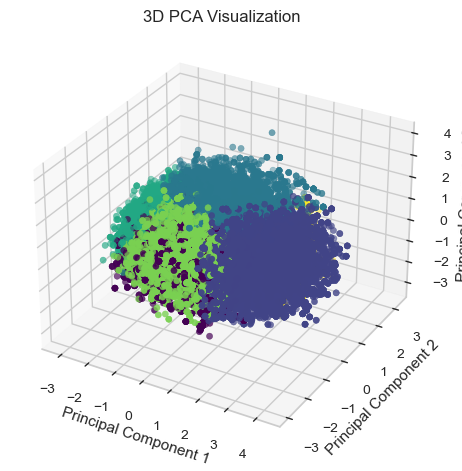

In [19]:
from mpl_toolkits.mplot3d import Axes3D 

pca = PCA(n_components=3)  
X_reduced = pca.fit_transform(X) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],  c=df['class_cluster'],cmap='viridis')  # No coloring based on clusters
plt.title('3D PCA Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3') 
plt.show()

## Data Mining through Classification

Aiming to handle possible overfitting issues on the upcoming classification models, we need to plot the cumulative PVE, to see how much of the total variance in the dataset is captured as we include more principal components. Supports us when deciding how many principal components to retain for dimensionality reduction or feature selection purposes.

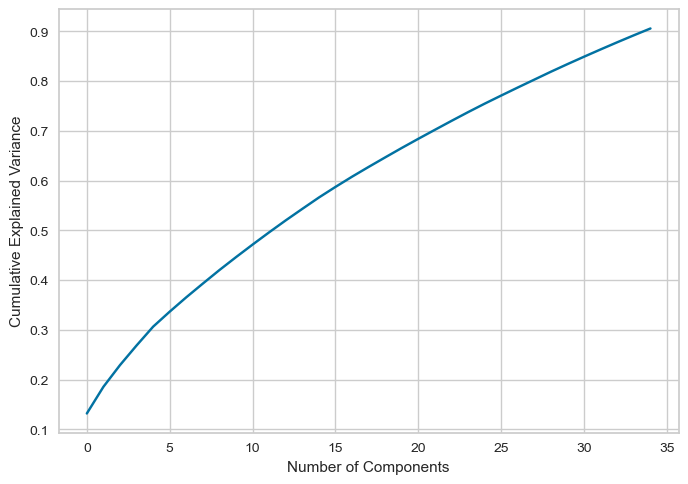

In [20]:
pca = PCA(n_components=35)
pca.fit(X) 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [21]:
pca.explained_variance_ratio_

array([0.13194201, 0.0536164 , 0.04360687, 0.03947929, 0.03781646,
       0.03019059, 0.02886169, 0.02761344, 0.02715115, 0.02595469,
       0.02527022, 0.02467153, 0.02398724, 0.02312819, 0.0228161 ,
       0.02131404, 0.02053509, 0.01963233, 0.0191982 , 0.01896226,
       0.01842175, 0.01806576, 0.01792869, 0.01757295, 0.01702328,
       0.0163678 , 0.01614991, 0.01588323, 0.01586383, 0.01529508,
       0.01491442, 0.01462516, 0.01435542, 0.01399679, 0.01367157])

In [22]:
X_reduced = pca.fit_transform(X)

It seems that the dataset can be effectively represented in a lower-dimensional space, while still preserving a significant amount of its variability. We proceed with 35 components, which cover approximately the 90% of variance.

## Random Forest

We define classification as the technique of learning a technique to predict the class of an element by choosing from predefined values. It is a supervised learning technique, since the training data is accompanied by labels for the class to which each belongs. When the 'prediction target' can take only two values we have binary classification. On the contrary, we have multi-class classification , in the case where the target variable can take more than two values. Since we do care about predicting the class of a word, with the latter's embedding be the input, we conduct a multi-class classification, using the RandomForestClassifier. Random Forest is a member of the family of 'ensemble learning algorithms'. Such classifiers utilize multiple learning algorithms in order to increase their predictive performance. Random Forest builds a multitude of decision trees during learning. Each tree answers a question with a 'Yes' or 'No' answer by analyzing the features given as 'predictors' in the model. The combination of all the trees' answers will draw the final answer, through a voting process, where the majority wins. Also, the Random Classifier, is renowned for its tolerance to overfitting phenomena and for the accuracy of its predictions. We conduct the classification on both class and division / section targets.

### Target Being the Class

Accuracy: 0.33539855742555946
Precision: 0.33539855742555946
Recall: 0.33539855742555946
F1-Score: 0.33539855742555946


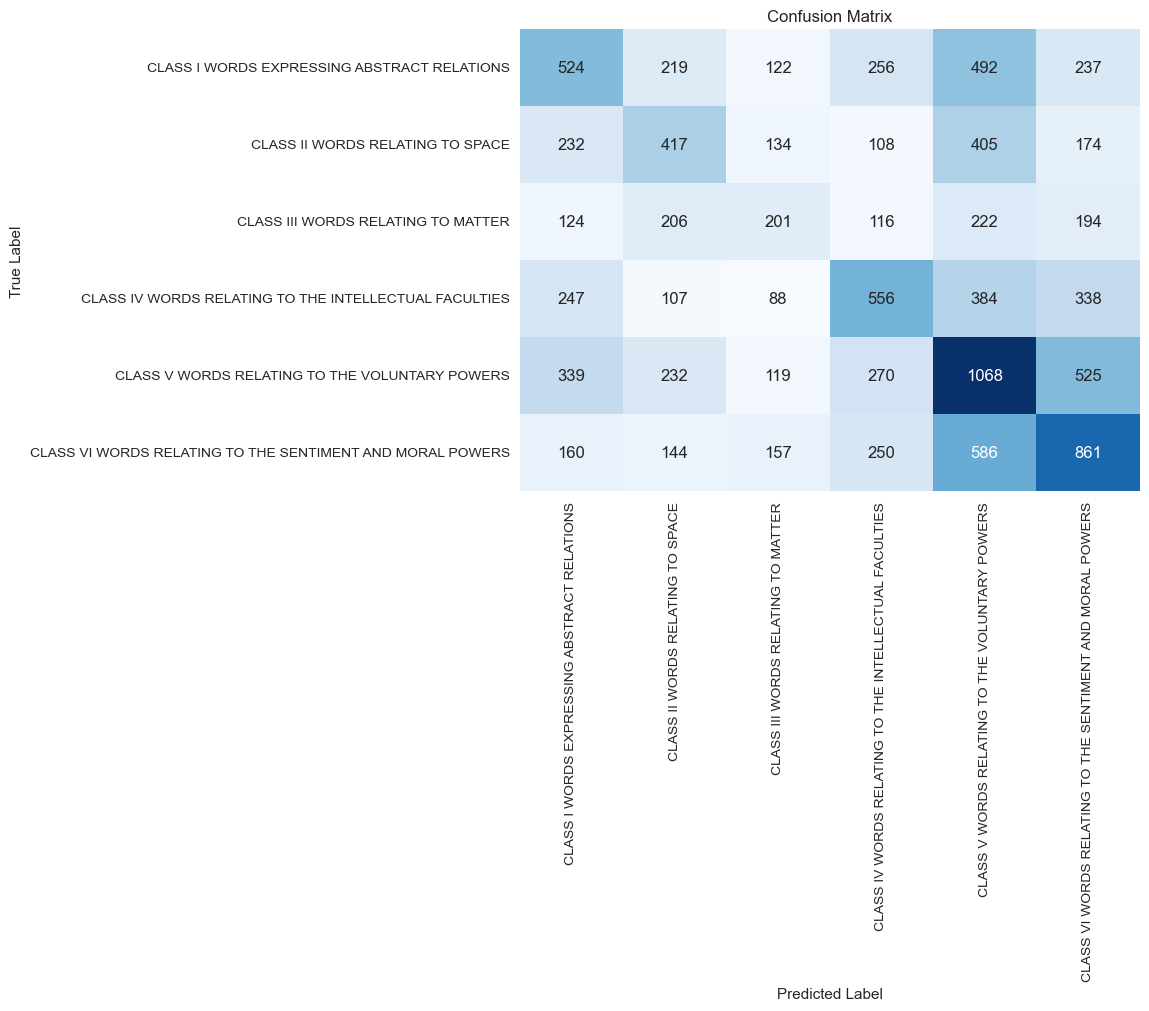

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
le = LabelEncoder()


X = X_reduced
# encode the prediction target with Label Encoder for better performance
Y = le.fit_transform(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(n_estimators=98, random_state=42)  # Parameter choices are adaptable
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Target Being the Section / Division

Accuracy: 0.15202515257998891
Precision: 0.15202515257998891
Recall: 0.15202515257998891
F1-Score: 0.15202515257998891


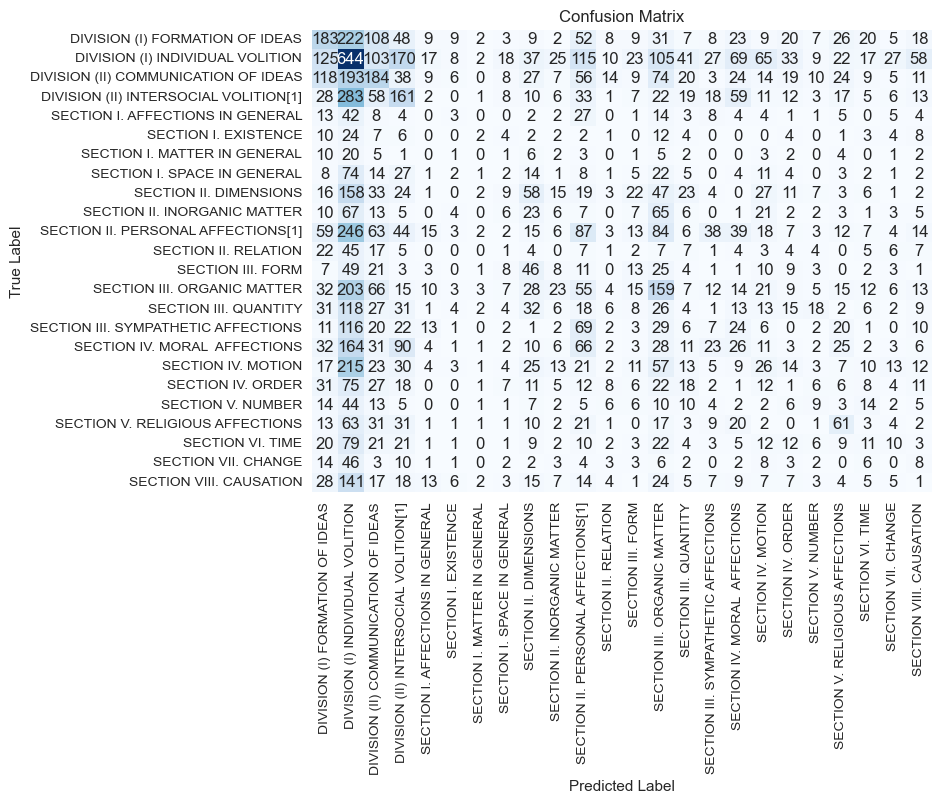

In [24]:
Y = le.fit_transform(create_consistent_labels(df.copy())) # utilize the method declared earlier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) # split the data

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Parameter choices are adaptable
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machines

Support Vector Machines (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates data points belonging to different classes in a high-dimensional space. This hyperplane is chosen in such a way that it maximizes the margin between the closest data points of different classes, which are called support vectors. One of the key decisions in using SVM is the choice of kernel function. The kernel function determines the shape of the decision boundary in the transformed feature space. We opt for RBF, since it is capable of capturing complex nonlinear relationships in the data. Moreover, RBF kernel allows SVM to create more flexible decision boundaries that can adapt to the shape of the data. All the above indicate that RBF is a well-suited kernel considering the nature of word embeddings. Also tried with linear kerner but the results were worse.

### Target Being the Class

In [25]:
from sklearn import svm

Y = le.fit_transform(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)

y_pred_rbf = clf_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF Kernel):", accuracy_rbf)

Accuracy (RBF Kernel): 0.4089143702607731


### Target Being the Section / Division

In [ ]:
Y = le.fit_transform(create_consistent_labels(df.copy())) # utilize the method declared earlier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

clf_rbf = svm.SVC(kernel='rbf') 
clf_rbf.fit(X_train, y_train)

y_pred_rbf = clf_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF Kernel):", accuracy_rbf)

## K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a simple yet powerful supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric and lazy learning algorithm, meaning it doesn't make assumptions about the underlying data distribution and doesn't learn a model during training. Instead, it stores all available data points and makes predictions based on the similarity of new data points to existing ones. KNN makes predictions based on the similarity of new data points to existing data points in a feature space

### Target being the Class

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Y = le.fit_transform(df['class']) # utilize the method declared earlier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# create the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=12)

# fit the Model
knn.fit(X_train, y_train)

# make Predictions
y_pred = knn.predict(X_test)

# evaluate classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

### Target being the Section / Division

In [ ]:
Y = le.fit_transform(create_consistent_labels(df.copy())) # utilize the method declared earlier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# create the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=12)

# fit the Model
knn.fit(X_train, y_train)

# make Predictions
y_pred = knn.predict(X_test)

# evaluate classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

The results of all three classifiers are disappointing. There are several factors which could be responsible for that :
* classification methods might struggle to handle such high-dimensional data effectively, even if we reduce their dimensions (through PCA)
* word embeddings capture complex semantic relationships between words, which might not be linearly separable in the embedding space
* the performance of the classifier can be really sensible to hyperparameters. However, we experimented multiple times by tuning the models' hyperparameters.
* the insufficiency of the training data. That would be indeed a reason for the bad performance, since we count less the 50000 records